# 🌲 Dataset: Forest Fires (Portugal)

- **Goal**: Predict the burned area of forest fires based on meteorological and spatial data.
- **Size**: 517 observations, 12 features—including both numeric and categorical—and one continuous target (burned area) [archive.ics.uci.edu+1github.com+1](https://archive.ics.uci.edu/ml/datasets/Forest%2B%2A%2AFires?utm_source=chatgpt.com).

### Features:

1. **X**, **Y** – spatial coordinates (1 to 9)
2. **month**, **day** – categorical
3. **FFMC**, **DMC**, **DC**, **ISI** – fire weather indices
4. **temp** – temperature (°C)
5. **RH** – relative humidity (%)
6. **wind** – wind speed (km/h)
7. **rain** – rainfall (mm/m²)
8. **area** – burned forest area (ha; output, highly skewed) [archive.ics.uci.edu+1ndang01.github.io+1](https://archive.ics.uci.edu/ml/datasets/Forest%2B%2A%2AFires?utm_source=chatgpt.com)

## 1. Loading & Initial Exploration

In [91]:
import pandas as pd

##### Use pd.read_csv to load the dataset.

In [92]:
df = pd.read_csv('./dataset/forestfires.csv')

##### Display the first and last 5 rows.

In [93]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


##### Inspect df.info() and check for missing data.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


##### Determine dataset dimensions (rows × columns).

In [95]:
df.shape

(517, 13)

##### Compute summary statistics (.describe()), both raw and for log‑transformed area to handle skew.

In [96]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [97]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

## 2. Categorical Encoding & Date Transformation

##### 1. Convert `month` and `day` into dummy variables using one-hot encoding.

In [98]:
df = pd.concat([df,pd.get_dummies(df[['month','day']], columns=['month','day'])],axis=1)

## 3. Filtering, Selection & Handling Skewness

##### Filter instances where area > 0.

In [99]:
df[df['area'] > 0]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,...,0,0,0,0,0,0,0,0,1,0
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,...,0,0,1,0,0,0,0,0,1,0
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,...,0,0,1,0,1,0,0,0,0,0
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,...,0,0,0,0,0,0,0,0,0,1
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,...,0,0,0,1,0,0,0,0,0,0
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,...,0,0,0,1,0,0,0,0,0,0
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,...,0,0,0,0,0,0,1,0,0,0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,...,0,0,0,0,0,0,1,0,0,0


##### Add a new column: log_area = np.log(area + 1).

📌 Why Add 1?
Adding 1 avoids log(0) which is undefined and would return -inf or cause errors if your area column has 0s.

In [100]:
import numpy as np

In [101]:
df['log_area'] = df['area'].apply(lambda x : np.log(x+1))

##### Select a subset of columns: weather indices, temp, RH, wind, rain, and log_area.

In [102]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_fri',
       'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed',
       'log_area'],
      dtype='object')

In [103]:
df[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','log_area']]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


##### Find days with temperature > 30 °C and low humidity (< 30%).

In [104]:
df[(df['temp'] > 30) & (df['RH'] < 30)]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,log_area
28,6,3,sep,sat,93.4,145.4,721.4,8.1,30.2,24,...,0,1,0,0,1,0,0,0,0,0.000000
421,2,4,aug,wed,95.2,217.7,690.0,18.0,30.8,19,...,0,0,0,0,0,0,0,0,1,0.000000
480,9,9,jul,thu,93.2,114.4,560.0,9.5,30.2,25,...,0,0,0,0,0,0,1,0,0,1.321756
481,4,3,jul,thu,93.2,114.4,560.0,9.5,30.2,22,...,0,0,0,0,0,0,1,0,0,0.000000
483,8,6,aug,sun,94.9,130.3,587.1,14.1,31.0,27,...,0,0,0,0,0,1,0,0,0,0.000000
484,2,5,aug,sun,94.9,130.3,587.1,14.1,33.1,25,...,0,0,0,0,0,1,0,0,0,3.311637
485,2,4,aug,mon,95.0,135.5,596.3,21.3,30.6,28,...,0,0,0,1,0,0,0,0,0,1.121678
491,4,4,aug,thu,95.8,152.0,624.1,13.8,32.4,21,...,0,0,0,0,0,0,1,0,0,0.000000
492,1,3,aug,fri,95.9,158.0,633.6,11.3,32.4,27,...,0,0,1,0,0,0,0,0,0,0.000000
496,4,5,aug,mon,96.2,175.5,661.8,16.8,32.6,26,...,0,0,0,1,0,0,0,0,0,1.327075


## 4. Correlations & Analysis

##### 1. Compute correlation matrix on numeric columns (after transformations).

In [105]:
correlation_matrix = df.corr(numeric_only=True)

##### 2. Identify which features most strongly correlate with log_area.

In [106]:
log_area_corr = correlation_matrix['log_area'].drop('log_area')

In [107]:
log_area_corr_sorted = log_area_corr.abs().sort_values(ascending=False)

In [108]:
strongest_corr = log_area_corr.loc[log_area_corr_sorted.index]

In [109]:
strongest_corr

area         0.524134
month_dec    0.139159
month_mar   -0.082736
month_sep    0.082638
DMC          0.067153
wind         0.066973
DC           0.066360
X            0.061995
RH          -0.053662
temp         0.053487
month_jan   -0.049558
FFMC         0.046799
day_fri     -0.044849
Y            0.038838
day_sat      0.036372
month_jun   -0.035363
month_aug   -0.035026
month_nov   -0.035009
month_may    0.032423
day_tue      0.032202
month_oct   -0.024000
rain         0.023311
day_thu     -0.022189
ISI         -0.010347
day_mon     -0.006160
month_jul   -0.005035
day_sun      0.004438
month_feb   -0.003330
month_apr   -0.002077
day_wed      0.000645
Name: log_area, dtype: float64

##### 3. Plot scatter between temp and log_area, compute their Pearson correlation.

<Axes: xlabel='temp', ylabel='log_area'>

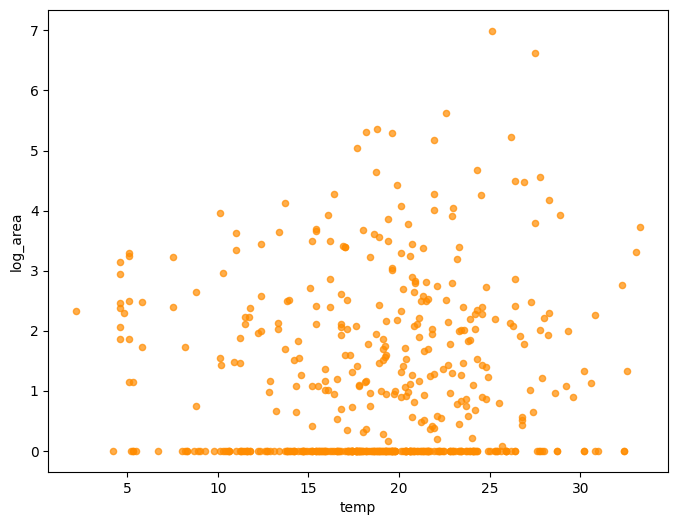

In [110]:
df.plot.scatter(x='temp',y='log_area',figsize=(8,6),color='darkorange',alpha=0.7)

## 5. Grouping & Aggregation

##### Add a binary column large_fire = area > median(area).

In [111]:
median = df['area'].median()

df['large_fire'] = df['area'] > median

##### Group by large_fire, calculate mean statistics of weather features.

In [112]:
df.groupby('large_fire').describe()

X                                                   Y  \
            count      mean       std  min  25%  50%  75%  max  count   
large_fire                                                              
False       259.0  4.540541  2.255333  1.0  3.0  4.0  6.0  9.0  259.0   
True        258.0  4.798450  2.368338  1.0  3.0  5.0  7.0  9.0  258.0   

                      ... day_wed      log_area                                \
                mean  ...     75%  max    count      mean       std       min   
large_fire            ...                                                       
False       4.243243  ...     0.0  1.0    259.0  0.013603  0.065758  0.000000   
True        4.356589  ...     0.0  1.0    258.0  2.212702  1.220656  0.431782   

                                                  
                25%       50%       75%      max  
large_fire                                        
False       0.00000  0.000000  0.000000  0.41871  
True        1.24702  2.024853  2.847633  6.99562  

[2 rows x 248 columns]

##### Further group/weather averages by month.

In [113]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_fri',
       'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed',
       'log_area', 'large_fire'],
      dtype='object')

In [114]:
df.groupby('month')['FFMC', 'DMC', 'DC', 'ISI','temp','RH','wind','rain'].mean()

/var/folders/pr/6264cydn30527m2bf6lwj2xr0000gn/T/ipykernel_98633/1490243723.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('month')['FFMC', 'DMC', 'DC', 'ISI','temp','RH','wind','rain'].mean()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain
month,,,,,,,,
apr,85.788889,15.911111,48.555556,5.377778,12.044444,46.888889,4.666667,0.000000
aug,92.336957,153.732609,641.077717,11.072283,21.631522,45.489130,4.086413,0.058696
dec,84.966667,26.122222,351.244444,3.466667,4.522222,38.444444,7.644444,0.000000
feb,82.905000,9.475000,54.670000,3.350000,9.635000,55.700000,3.755000,0.000000
jan,50.400000,2.400000,90.350000,1.450000,5.250000,89.000000,2.000000,0.000000
jul,91.328125,110.387500,450.603125,9.393750,22.109375,45.125000,3.734375,0.006250
jun,89.429412,93.382353,297.705882,11.776471,20.494118,45.117647,4.135294,0.000000
mar,89.444444,34.542593,75.942593,7.107407,13.083333,40.000000,4.968519,0.003704
may,87.350000,26.700000,93.750000,4.600000,14.650000,67.000000,4.450000,0.000000


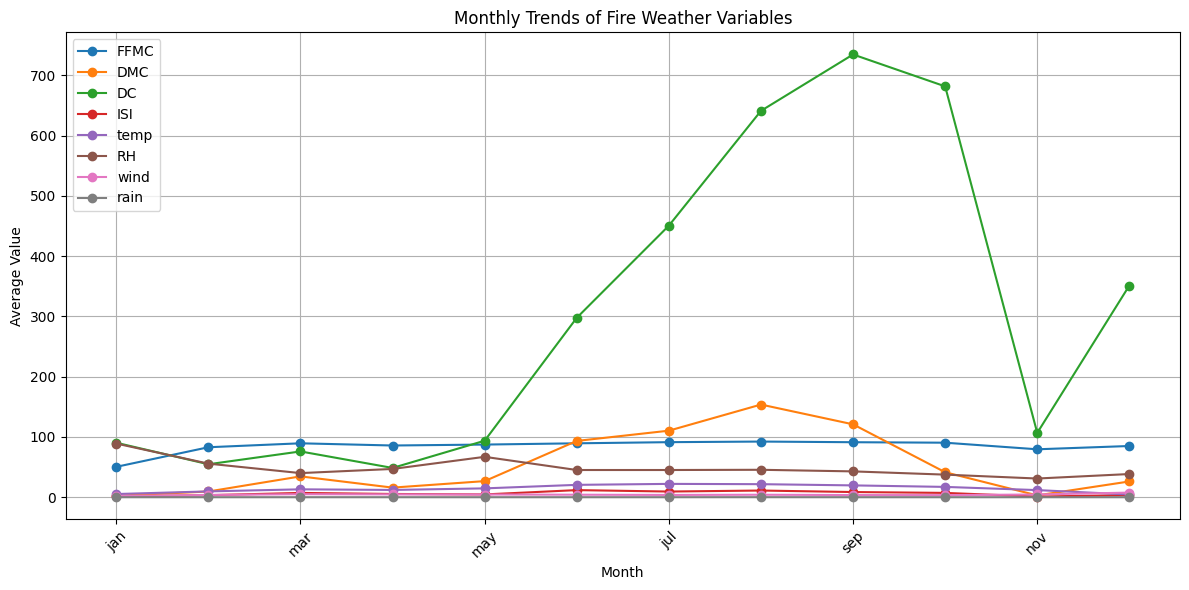

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

df['month'] = pd.Categorical(df['month'],categories=month_order,ordered=True)

monthly_means = df.groupby('month')[['FFMC', 'DMC', 'DC', 'ISI','temp','RH','wind','rain']].mean()

monthly_means = monthly_means.loc[month_order]

#Plot
monthly_means.plot(kind = 'line',marker='o',figsize=(12,6))
plt.title('Monthly Trends of Fire Weather Variables')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

## 7. Outlier Detection & Treatment

##### Identify days where rain is above the 99th percentile.

In [125]:
df['new_rain'] = df['rain']

lower_bound = df['new_rain'].quantile(0.01)
upper_bound = df['new_rain'].quantile(0.99)

df[df['new_rain'] > upper_bound]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,log_area,large_fire,new_rain
243,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,...,0,0,0,1,0,0,0,0.000000,False,1.0
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,...,0,0,0,0,0,1,0,2.469793,True,6.4
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,...,0,0,0,0,0,1,0,0.000000,False,0.8
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,...,0,0,0,0,0,1,0,0.000000,False,0.8
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,...,0,0,0,0,0,1,0,0.000000,False,0.4
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,...,1,0,0,0,0,0,0,1.153732,True,1.4


##### Replace them with the 95th percentile (capping).

In [129]:
df.loc[df['new_rain'] > upper_bound,'new_rain'] = df['new_rain'].quantile(0.95)

In [130]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_fri',
       'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed',
       'log_area', 'large_fire', 'new_rain'],
      dtype='object')

In [132]:
df['rain']

0      0.0
1      0.0
2      0.0
3      0.2
4      0.0
      ... 
512    0.0
513    0.0
514    0.0
515    0.0
516    0.0
Name: rain, Length: 517, dtype: float64

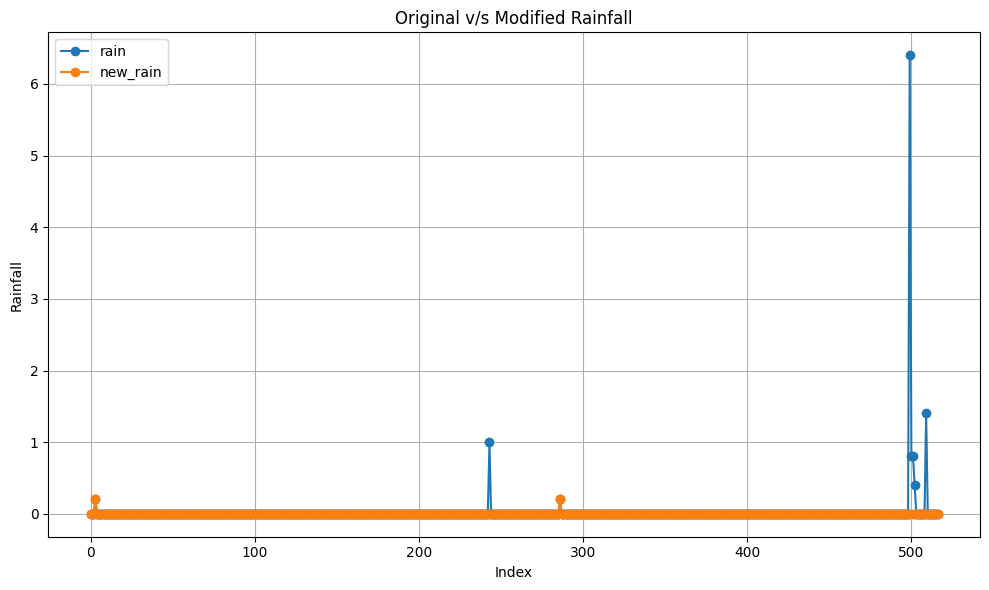

In [133]:
df[['rain','new_rain']].plot(kind='line',figsize=(10,6),marker='o')
plt.title('Original v/s Modified Rainfall')
plt.xlabel('Index')
plt.ylabel('Rainfall')
plt.grid(True)
plt.legend(['rain','new_rain'])
plt.tight_layout()
plt.show()

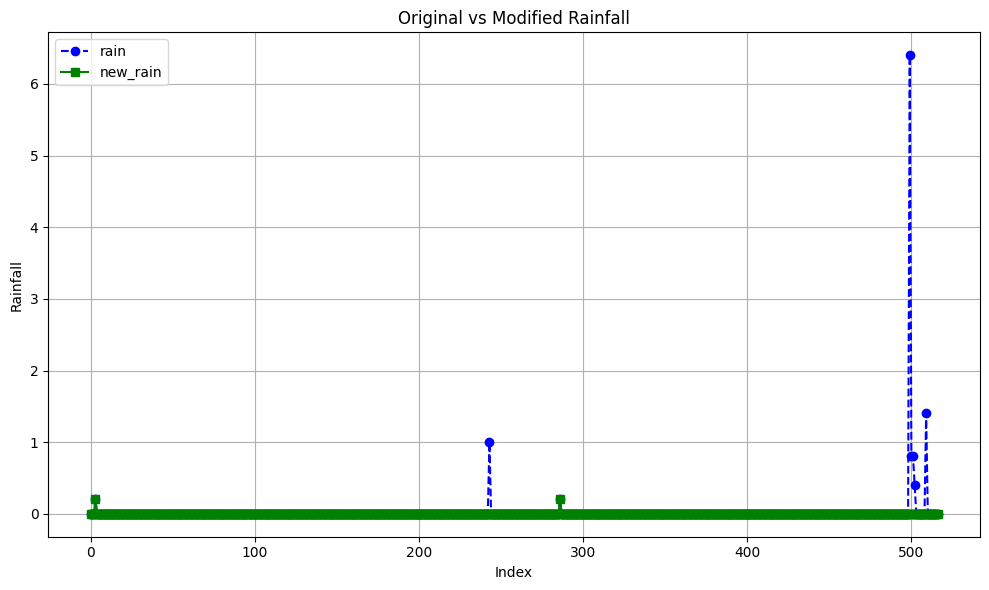

## 8. Regression Challenge

##### Fit a simple linear regression (sklearn or statsmodels) predicting log_area using temp, RH, wind, rain, and ISI.

In [136]:
import statsmodels.api as sm

X = df[['temp','RH','wind','rain','ISI']]
y = df['log_area']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.346
Date:                Tue, 15 Jul 2025   Prob (F-statistic):              0.243
Time:                        20:13:42   Log-Likelihood:                -903.09
No. Observations:                 517   AIC:                             1818.
Df Residuals:                     511   BIC:                             1844.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7053      0.444      1.588      0.1

## 9. Visualization

##### Create a boxplot of log_area by month.

jan         Axes(0.1,0.736957;0.235294x0.163043)
feb    Axes(0.382353,0.736957;0.235294x0.163043)
mar    Axes(0.664706,0.736957;0.235294x0.163043)
apr         Axes(0.1,0.541304;0.235294x0.163043)
may    Axes(0.382353,0.541304;0.235294x0.163043)
jun    Axes(0.664706,0.541304;0.235294x0.163043)
jul         Axes(0.1,0.345652;0.235294x0.163043)
aug    Axes(0.382353,0.345652;0.235294x0.163043)
sep    Axes(0.664706,0.345652;0.235294x0.163043)
oct             Axes(0.1,0.15;0.235294x0.163043)
nov        Axes(0.382353,0.15;0.235294x0.163043)
dec        Axes(0.664706,0.15;0.235294x0.163043)
dtype: object

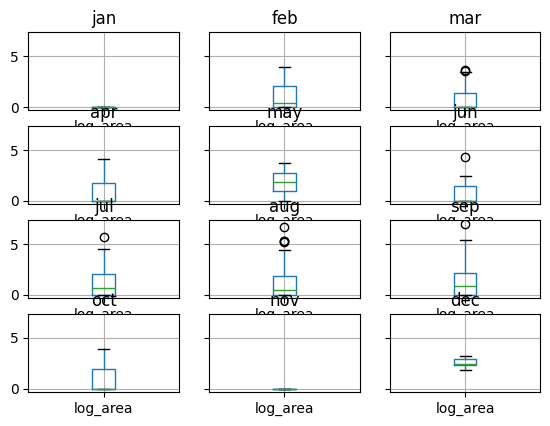

In [137]:
df.groupby('month').boxplot(column=['log_area'])

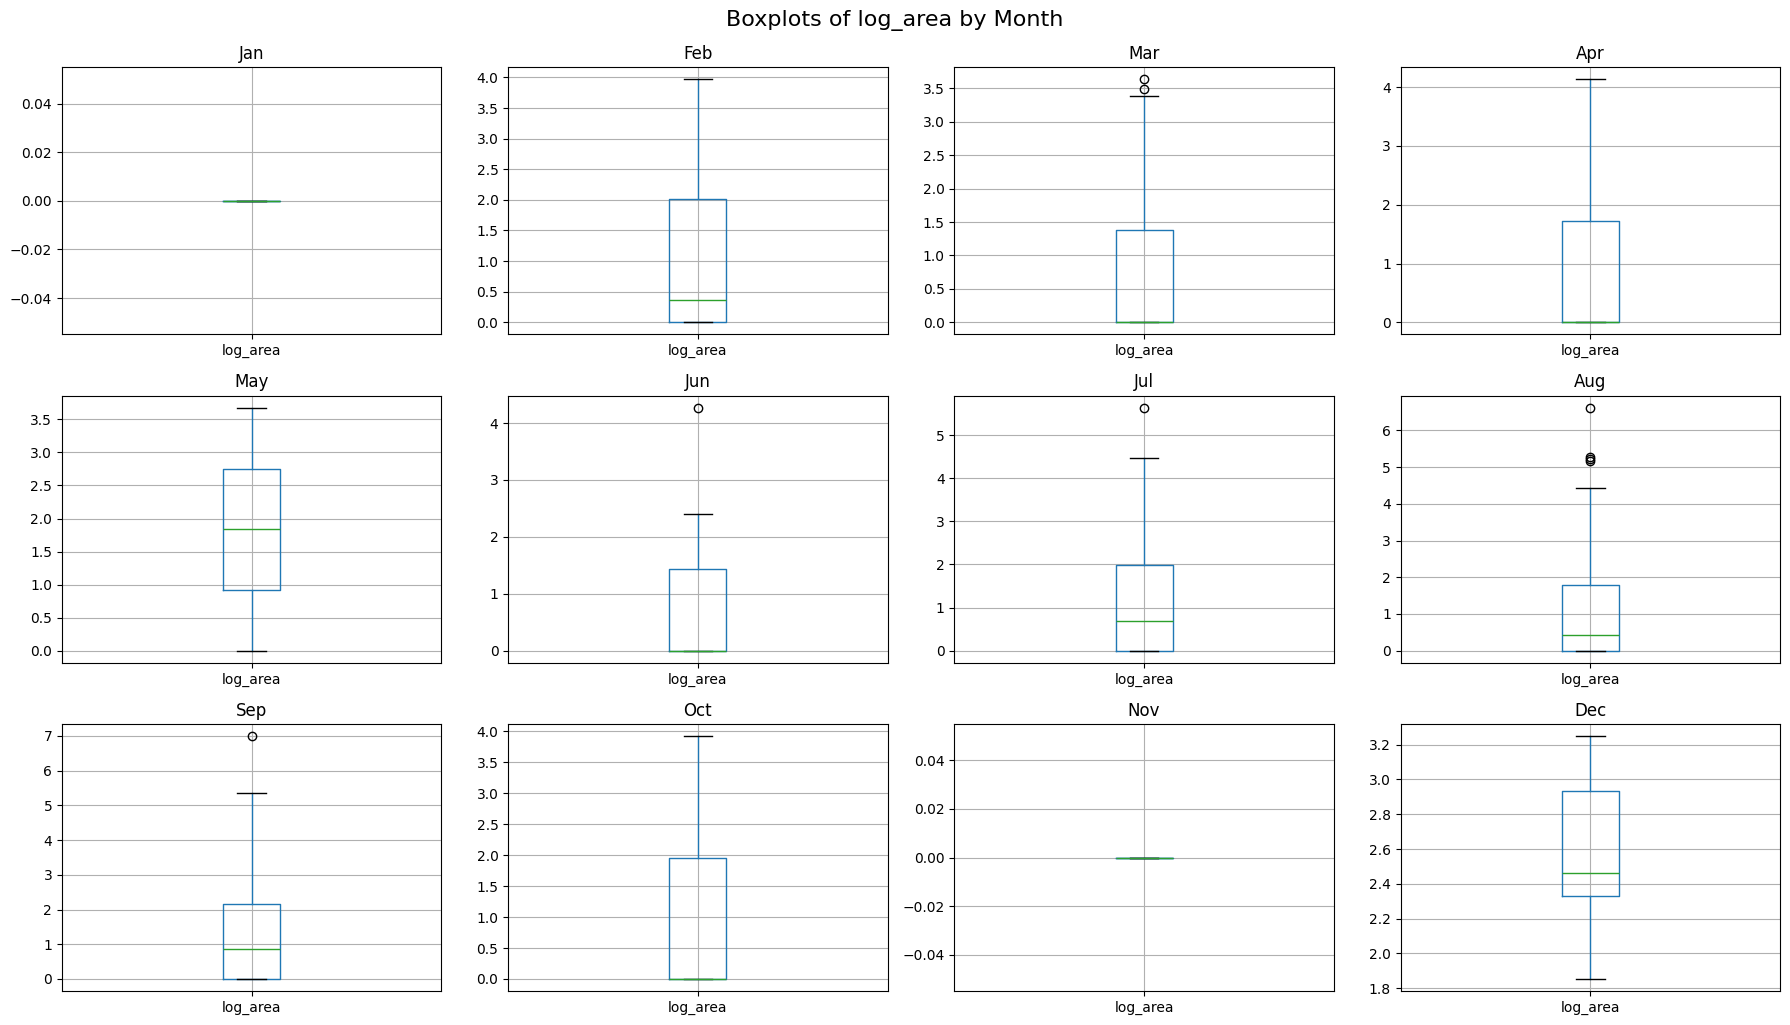

In [138]:
import matplotlib.pyplot as plt

# Group by month
grouped = df.groupby('month')

# Set up the figure size and layout
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 10))  # adjust grid as needed
axes = axes.flatten()  # flatten for easy indexing

# Month order (optional, if months are strings)
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Plot each month's boxplot
for i, month in enumerate(month_order):
    if month in grouped.groups:
        grouped.get_group(month).boxplot(column='log_area', ax=axes[i])
        axes[i].set_title(f'{month.capitalize()}')
    else:
        axes[i].axis('off')  # Hide empty subplot

plt.tight_layout()
plt.suptitle('Boxplots of log_area by Month', fontsize=16, y=1.02)
plt.show()


##### Create a heatmap of correlation matrix.

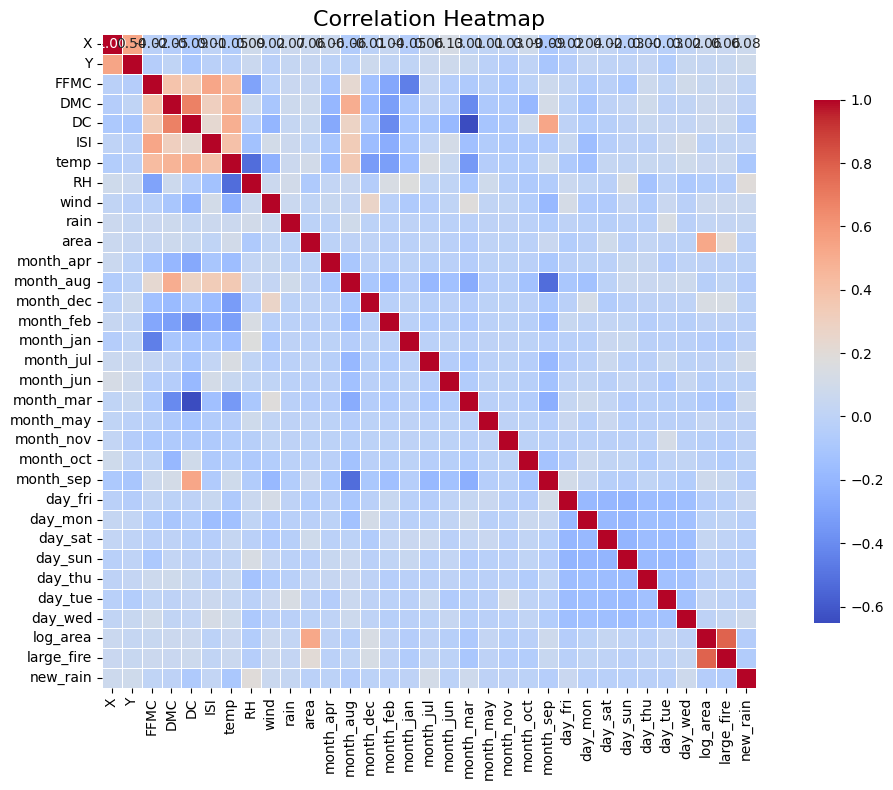

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, 
            annot=True,         # show correlation coefficients
            fmt=".2f",          # format decimals
            cmap='coolwarm',    # color palette
            linewidths=0.5,     # line between boxes
            square=True,        # square boxes
            cbar_kws={"shrink": 0.8})  # shrink color bar

# Title and layout
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


##### 10. Exporting Cleaned Data

In [141]:
df.to_csv('forestfires_cleaned.csv')